In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
trainDataGen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = .2,
    zoom_range = .3,
    horizontal_flip = True
)

In [5]:
test_dir = "./Dataset-2/test"
train_dir = "./Dataset-2/train"

In [6]:
trainset = trainDataGen.flow_from_directory(
    train_dir,
    target_size = (64,64),
    batch_size = 32,
    class_mode = "binary"
)

Found 2714 images belonging to 2 classes.


In [7]:
testDataGen = ImageDataGenerator(
    rescale = 1./255
)

In [8]:
testset = testDataGen.flow_from_directory(
    test_dir,
    target_size = (64,64),
    batch_size = 32,
    class_mode="binary"
)

Found 286 images belonging to 2 classes.


In [9]:
from keras.models import Sequential

In [10]:
cnn = Sequential()

In [11]:
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout

In [12]:
cnn.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(64,64,3)))

In [13]:
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(.2))

In [14]:
cnn.add(Conv2D(filters=32,kernel_size=3,activation="relu"))

In [15]:
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(.2))

In [16]:
cnn.add(Flatten())

In [17]:
cnn.add(Dense(units=128,activation="relu"))
cnn.add(Dropout(.2))
cnn.add(Dense(units=64,activation="relu"))
cnn.add(Dropout(.2))
cnn.add(Dense(units=32,activation="relu"))
cnn.add(Dropout(.2))

In [18]:
cnn.add(Dense(units=1,activation="sigmoid"))

In [19]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [21]:
history=cnn.fit(
    x=trainset,
    validation_data=testset,
    epochs = 60
)

Epoch 1/60
85/85 [==============================] - 12s 138ms/step - loss: 0.6578 - accuracy: 0.6231 - val_loss: 0.5303 - val_accuracy: 0.7692
Epoch 2/60
85/85 [==============================] - 9s 108ms/step - loss: 0.6062 - accuracy: 0.6780 - val_loss: 0.5091 - val_accuracy: 0.7762
Epoch 3/60
85/85 [==============================] - 9s 111ms/step - loss: 0.5258 - accuracy: 0.7432 - val_loss: 0.5154 - val_accuracy: 0.7273
Epoch 4/60
85/85 [==============================] - 10s 115ms/step - loss: 0.5079 - accuracy: 0.7631 - val_loss: 0.4995 - val_accuracy: 0.7622
Epoch 5/60
85/85 [==============================] - 9s 110ms/step - loss: 0.4817 - accuracy: 0.7859 - val_loss: 0.4125 - val_accuracy: 0.8287
Epoch 6/60
85/85 [==============================] - 9s 112ms/step - loss: 0.4508 - accuracy: 0.7973 - val_loss: 0.4215 - val_accuracy: 0.8322
Epoch 7/60
85/85 [==============================] - 9s 112ms/step - loss: 0.4438 - accuracy: 0.7988 - val_loss: 0.4881 - val_accuracy: 0.7797
Epoc

85/85 [==============================] - 12s 141ms/step - loss: 0.0698 - accuracy: 0.9779 - val_loss: 0.0972 - val_accuracy: 0.9510
Epoch 59/60
85/85 [==============================] - 12s 143ms/step - loss: 0.0719 - accuracy: 0.9746 - val_loss: 0.0540 - val_accuracy: 0.9720
Epoch 60/60
85/85 [==============================] - 13s 154ms/step - loss: 0.0599 - accuracy: 0.9775 - val_loss: 0.0461 - val_accuracy: 0.9790


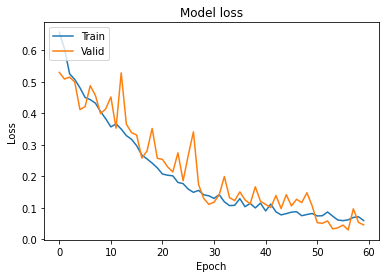

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

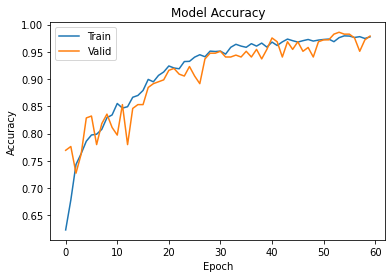

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [25]:
trainset.class_indices

{'no': 0, 'yes': 1}

In [26]:
#cnn.save("cse465_cnn.h5")

In [27]:
import numpy as np
from keras.preprocessing import image
image_test = image.load_img('./Dataset-2/pred/pred0.jpg',target_size=(64,64))

In [28]:
test_img = image.img_to_array(image_test)
test_img = np.expand_dims(test_img,axis=0)
result = cnn.predict(test_img/255)
print(result)
if result > 0.5:
    result = "yes"
else:
    result = "No"
print(result)

[[0.00047056]]
No


______Healthy Brain Images______


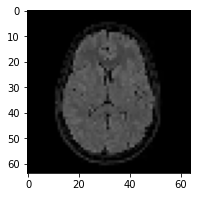

In [29]:
print('______Healthy Brain Images______')
plt.figure(figsize=(20,3))
plt.imshow(image_test)

In [30]:
image_test = image.load_img('./Dataset-2/pred/pred45.jpg',target_size=(64,64))
test_img = image.img_to_array(image_test)
test_img = np.expand_dims(test_img,axis=0)
result = cnn.predict(test_img/255)
print(result)
if result > 0.5:
    result = "yes"
else:
    result = "No"
print(result)

[[0.9999207]]
yes


______Unhealthy Brain Images______


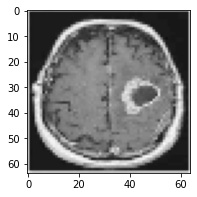

In [31]:
print('______Unhealthy Brain Images______')
plt.figure(figsize=(20,3))
plt.imshow(image_test)

In [32]:
from keras.models import load_model
saved_model = load_model("cse465_cnn.h5")
result1 = saved_model.predict(test_img/255)
print(result1)

[[0.9998584]]
